# Cuaderno que contiene descriptiva inicial sobre la información disponible en lo relacionado con no fraude (Causa Raíz)

### Tenemos la visual de la información relacionada con el comportamiento en el mes, con la gestión y diferentes aspectos de los productos y causas presentes.

### Instalar librerias necesarias para visual de la tabla y contenido 

In [1]:
%pip install -U dtale[ngrok]
%pip install nbformat --upgrade
%pip install sweetviz


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Carga de librerias y rutas de conxión
import os
import sys
import pandas as pd
import sweetviz
import dtale
import dtale.app as dtale_app
# sys.path.append("../..")
# Obtener la ruta del directorio raíz del proyecto (un nivel arriba de notebooks/)
ruta_proyecto = os.path.abspath(os.path.join(os.getcwd(), "..", '..'))

if ruta_proyecto not in sys.path:
    sys.path.append(ruta_proyecto)

ruta_src = os.path.join(ruta_proyecto, "src")
if ruta_src not in sys.path:
    sys.path.append(ruta_src)
    
from utils.figures import (  # noqa: E402
    convert_columns_names,
    process_product_column,
    plot_bar_percentage,
    # plot_bar_percentage2,
    plot_weekly_distribution,
    plot_weekday_distribution,
    plot_pie_chart,
    plot_stacked_barh,
    plot_joint_distribution,
    plot_linear_weekday_distribution
)
from src.utils.utils import change_values # noqa: E402

import warnings # noqa: E402

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

d:\Gitlab\davivienda-causa-raiz\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carga de la base de datos utilizada

In [3]:
path = 'D:/Gitlab/Causa-raiz/data/'
formato = '.xlsx'
df = pd.read_excel(path+'Reclamos Cerrados Emergia Diciembre'+formato)

### Visualización de encabezado con unos registros para ver su estructura

In [4]:
df.head(2)

NUMERO_SS               TIPO CANAL_ORIGEN  \
0  1-39600193259  Reclamación Super     Clientes   
1  1-39642160860  Reclamación Super     Clientes   

                        MOTIVO2 FECHA_APERTURA FECHA_COMPROMISO FECHA_CIERRE  \
0     Inconformidad en el saldo     2023-11-17       2023-12-01   2023-12-01   
1  Descuento no pago atm propio     2023-11-20       2023-12-04   2023-12-01   

    ESTADO RESPONSABLE OPORTUNIDAD  ...       CAUSA_ORIGEN  \
0  Cerrado     JMDUQUE    Oportuno  ...  No coincide saldo   
1  Cerrado     LAGUORR    Oportuno  ...  Falla dispensador   

                  NOMBRE_PRODUCTO DIAS_CALENDARIO RANGO_CALENDARIO  \
0  CREDITO-SUBROGACION INDIVIDUAL              14  3. 11 - 15 días   
1                             NaN              11  3. 11 - 15 días   

                         MOTIVO DIAS_HABILES   RANGO_HABILES FAVORABLE  \
0     Inconformidad en el saldo           10  2. 7 - 10 días         N   
1  Descuento no pago atm propio            9  2. 7 - 10 días         Y   

  PRIORIZACION PRORROGAS  
0       Normal       NaN  
1       Normal       NaN  

[2 rows x 32 columns]

In [5]:
# visualización de datos
dtale_app.USE_NGROK = False
dtale.show(df)

### Estandarizar la información disponible


In [6]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

df = df.query("""`CANAL_ORIGEN` == 'Clientes' and `GRUPO2` == 'No Fraude' and `GRUPO3` == 'Clientes'""")
df = df[df.FECHA_APERTURA.dt.month==12]
df.reset_index(drop=True, inplace=True)

In [7]:
df.shape

(4763, 32)

In [8]:
df.rename(columns={'NOMBRE_PRODUCTO':'producto'}, inplace=True)
df = convert_columns_names(df)
df = process_product_column(df)
# df = change_values(df, "medio_de_radicacion", 0, "Otros")
df = change_values(df, "medio_respuesta", 0, "Otros")

2025-02-27 10:18:22,498 - INFO - En la columna: producto se detectaron 1064 valores nulos


In [9]:
pd.concat([df['motivo2'].value_counts(), df['motivo'].value_counts()], axis=1)

count  count
Descuento y no pago                745.0  745.0
Inconformidad en débito            645.0  645.0
Inconformidad en el saldo          508.0  508.0
Descuento no pago atm propio       467.0  467.0
Inconsistencia TX otras redes      293.0  293.0
Certificaciones/paz y salvos       273.0  273.0
Inconsistencia en compras          271.0  271.0
Datos de la transacción            238.0  238.0
Funcionamiento del canal           234.0  234.0
Atención del funcionario           204.0  204.0
Liquidación de intereses           132.0  131.0
Inconformidad sobre el premio      124.0  124.0
Tarifas de servicio/comisiones     121.0  121.0
Inconformidad venta                 89.0   89.0
Info errada producto-servicio       58.0   58.0
Reporte o calificación              56.0   56.0
Aclaración de movimiento            45.0   45.0
Notificaciones erradas              39.0   39.0
Pagos mal aplicados                 31.0   22.0
Tarjeta de crédito emp              22.0   22.0
Inconformidad gestión cobranza      18.0   17.0
Inconsistencia pago servicios       18.0   18.0
Extracto no generado-recibido       18.0   17.0
Acumulación davipuntos-millas       15.0   15.0
Protección de datos                 15.0   15.0
Inconsisten transf daviplata        13.0   13.0
Reclam. Corresponsal                12.0   12.0
Estados de cuenta                    7.0    7.0
Bienes recibidos en pago             6.0    6.0
Solicitud voucher                    5.0    5.0
Inconsistencia en Saldo              5.0    3.0
Copia de polizas                     5.0    5.0
Recaudos mal aplicados               3.0    3.0
Endoso póliza o cambio cia           2.0    2.0
Ajuste tasa hipotec. Retención       2.0    2.0
Ajuste valor asegurado               2.0    2.0
Certificac. y/o paz y salvos         2.0    2.0
Inconsistencia acuerdo de pago       2.0    2.0
Diferencia intereses y/o saldo       2.0    2.0
Campañas (Call Bco y Oursourcing)    2.0    NaN
Inconformidad pago-Dev cheque        1.0    1.0
Embargo                              1.0    1.0
Cuenta Bloqueada                     1.0    1.0
Inconformidad débito automatic       1.0    1.0
Certificaciones/Paz y Salvos         1.0    NaN
Cartera Vehículo Productivo          1.0    1.0
Inconsistencia en conservación       1.0    NaN
Inconformidad Tasa Hip/Leasing       1.0    1.0
Procesos Judiciales                  1.0    1.0
Reporte o calificación emp           1.0    1.0
Indemnización seguro                 1.0    1.0
Tarjeta de Crédito                   NaN   21.0

In [10]:
df['causa_raiz'] = df['motivo2'].values
df['causa_raiz'][df['causa_raiz'].isna()] = df['motivo'][df['causa_raiz'].isna()].values
df['causa_raiz'].value_counts()

causa_raiz
Descuento y no pago                  745
Inconformidad en débito              645
Inconformidad en el saldo            508
Descuento no pago atm propio         467
Inconsistencia TX otras redes        293
Certificaciones/paz y salvos         273
Inconsistencia en compras            271
Datos de la transacción              238
Funcionamiento del canal             234
Atención del funcionario             204
Liquidación de intereses             132
Inconformidad sobre el premio        124
Tarifas de servicio/comisiones       121
Inconformidad venta                   89
Info errada producto-servicio         58
Reporte o calificación                56
Aclaración de movimiento              45
Notificaciones erradas                39
Pagos mal aplicados                   31
Tarjeta de crédito emp                22
Inconsistencia pago servicios         18
Inconformidad gestión cobranza        18
Extracto no generado-recibido         18
Protección de datos                   15
Acumu

In [11]:
df['producto_'].value_counts()

producto_
CUENTA DE AHORROS DAMAS                1702
NO ESPECIFICADO                        1064
TARJETA DE CREDITO                      809
CUENTA DE AHORROS FIJO DIARIO           551
CREDIEXPRESS FIJO                       231
CREDITO                                 103
LEASING HABITACIONAL                    101
CUENTA CORRIENTE                         53
CREDITO DE VEHICULO                      50
LINEAS DE CREDITO PLUS                   24
CERTIFICADOS                             23
Otros                                    15
TARJETA MÓVIL PEPE GANGA                 12
CREDIEXPRESS ROTATIVO BASICO URBANO      10
CREDITO ADELANTO DE NOMINA                9
TARJETA VIRTUAL DAVIVIENDA                6
Name: count, dtype: int64

In [12]:
# visualización de datos
dtale_app.USE_NGROK = False
dtale.show(df)

### Visualización de información entre los campos

In [13]:
plot_bar_percentage(df, 'causa_raiz', percentage=99.5)
plot_bar_percentage(df, 'causa_raiz', percentage=80)

In [14]:
df.fecha_cierre.value_counts()

fecha_cierre
2023-12-28    507
2023-12-22    491
2023-12-29    482
2023-12-27    459
2023-12-20    375
2023-12-21    365
2023-12-26    361
2023-12-18    318
2023-12-19    312
2023-12-15    221
2023-12-14    208
2023-12-13    196
2023-12-12    118
2023-12-11    101
2023-12-06     77
2023-12-07     64
2023-12-05     44
2023-12-16     26
2023-12-04     13
2023-12-09      9
2023-12-23      8
2023-12-25      4
2023-12-30      4
Name: count, dtype: int64

In [15]:
plot_weekly_distribution(df, "fecha_apertura")

In [16]:
# index_order = [
# 'Error Transacción','Retiro No Exitoso','Cobro No Autorizado','Fraude Virtual',
# 'Movimiento Desconocido','Transacción Desconocida', 'Solicitud Reporte',
#  'Solicitud Certificación','Solicitud Aclaración', 'Solicitud Información',
# 'Creación Producto Servicio', 'Causa No Identificada'
# ]
index_order = df.motivo2.value_counts().index[:17].tolist()
plot_weekday_distribution(df, 'fecha_apertura', 'causa_raiz', order=index_order)

In [17]:
plot_linear_weekday_distribution(df, 'fecha_apertura', 'causa_raiz', order=index_order, threshold=1)


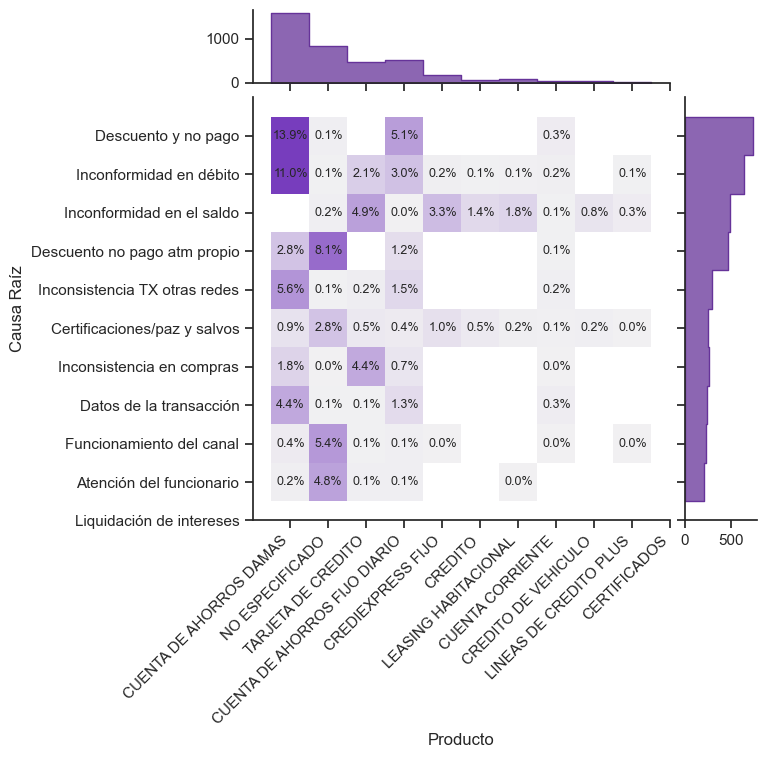

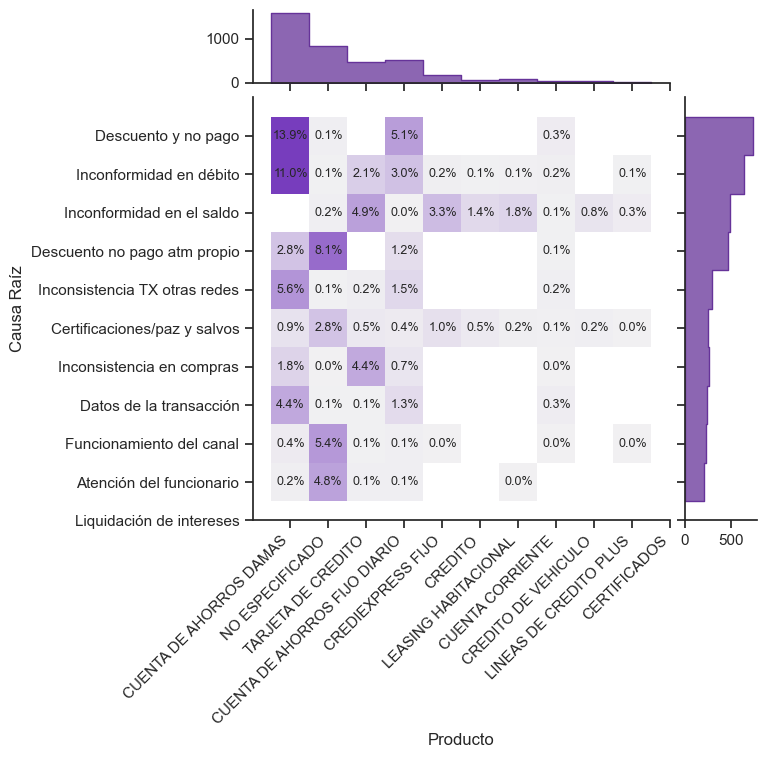

In [18]:
col_order = df['producto_'].value_counts().index.tolist()

plot_joint_distribution(
    df,
    x="producto_",
    y="causa_raiz",
    x_order=col_order,
    y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=10,
    top_x=10,
    fontsize=9,
)

In [19]:
plot_pie_chart(df, 'tipo', 3, n_colors=5, num_registros=True)

In [20]:
plot_stacked_barh(df,  'tipo','producto_', xlim=(0, 8000), 
                  remove_axes_lines=True, rounded_bars=True, 
                  n_colors=4, threshold=80)

In [21]:
plot_pie_chart(df, 'producto_', 3, n_colors=7, num_registros=True)


In [22]:
plot_pie_chart(df, 'causa_origen', 3, n_colors=7, num_registros=True)


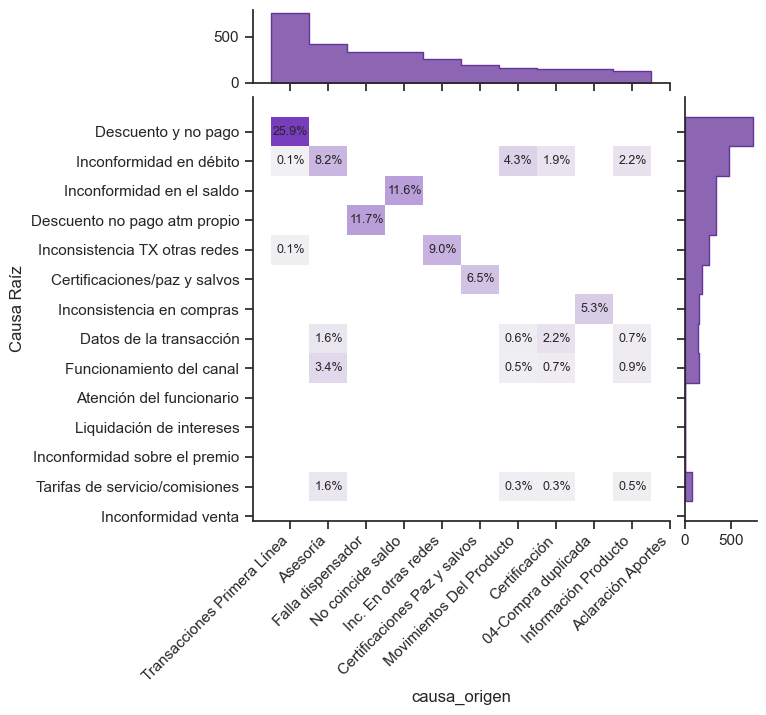

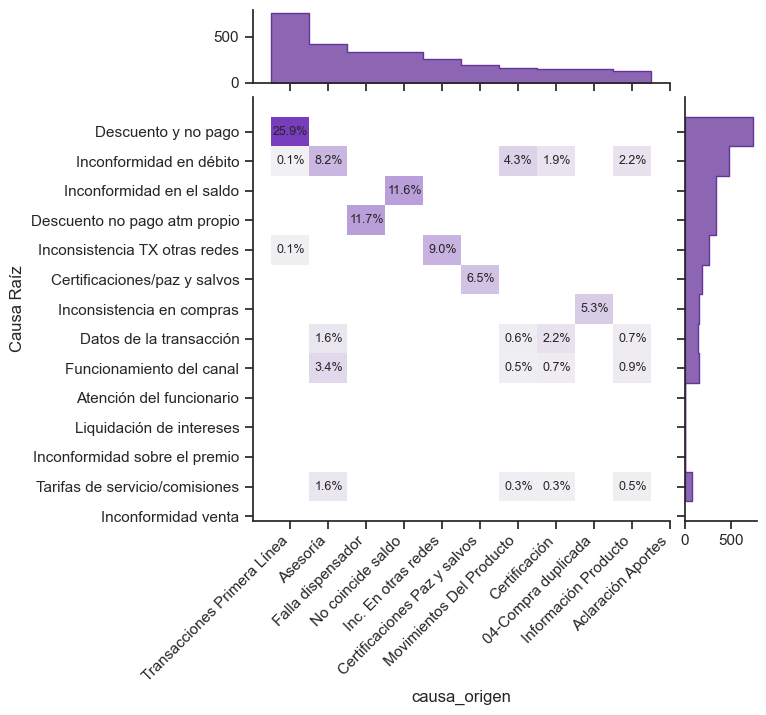

In [23]:
col_order = df['causa_origen'].value_counts().index.tolist()

plot_joint_distribution(
    df,
    x="causa_origen",
    y="causa_raiz",
    x_order=col_order,
    y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="causa_origen",
    top_y=10,
    top_x=10,
    fontsize=9,
)


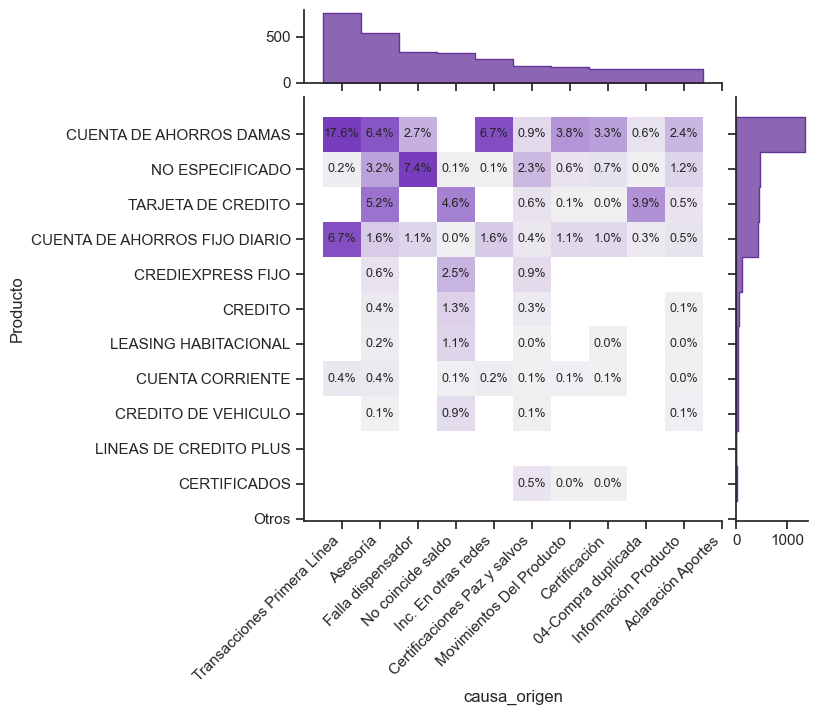

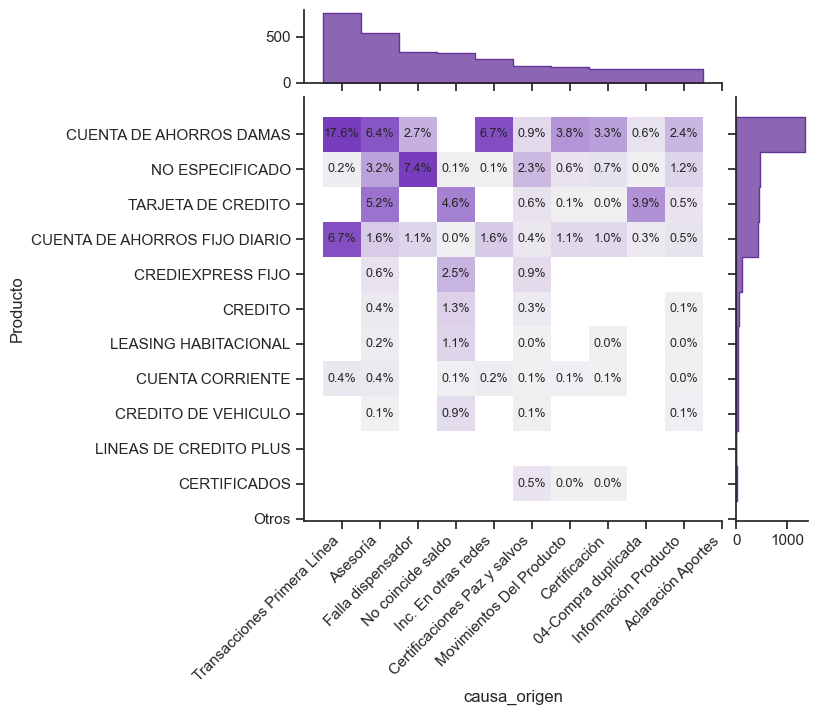

In [24]:
col_order = df['causa_origen'].value_counts().index.tolist()
col_order_ = df['producto_'].value_counts().index.tolist()

plot_joint_distribution(
    df,
    x="causa_origen",
    y="producto_",
    x_order=col_order,
    y_order=col_order_,
    label_rotation=45,
    x_label="causa_origen",
    y_label="Producto",
    top_y=10,
    top_x=10,
    fontsize=9,
)


In [25]:
plot_bar_percentage(df, 'des2', percentage=85)

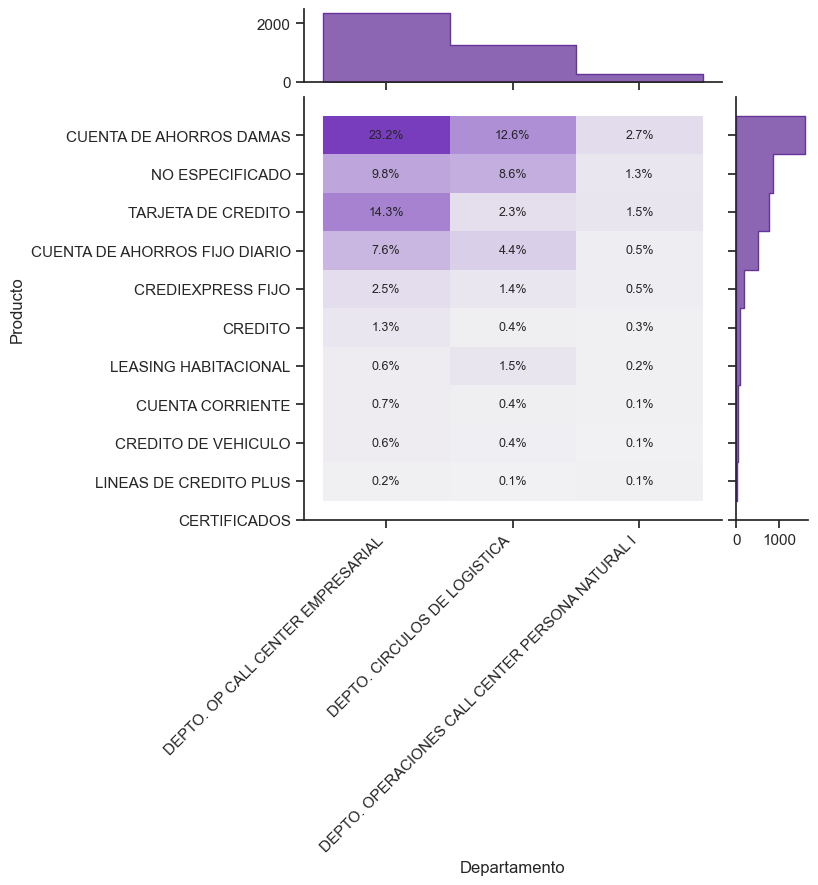

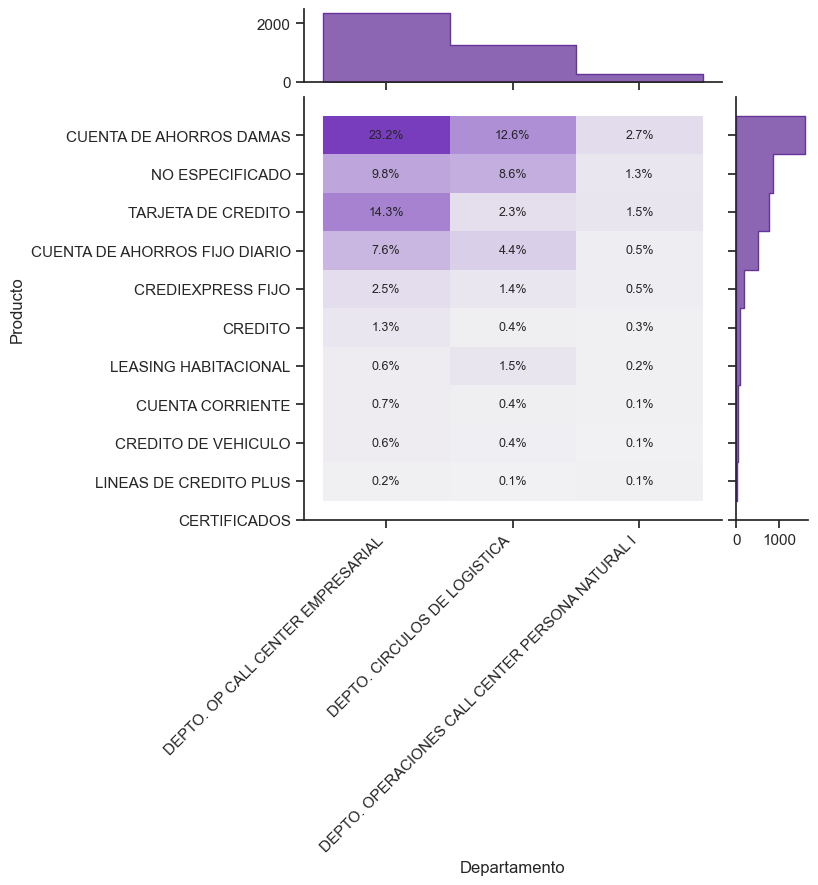

In [26]:
col_order = df['des2'].value_counts().index.tolist()[:3]
col_order_ = df['producto_'].value_counts().index.tolist()

plot_joint_distribution(
    df,
    x="des2",
    y="producto_",
    x_order=col_order,
    y_order=col_order_,
    label_rotation=45,
    x_label="Departamento",
    y_label="Producto",
    top_y=10,
    top_x=10,
    fontsize=9,
)


In [27]:
plot_pie_chart(df, 'rango_calendario', 3, n_colors=7, num_registros=True)


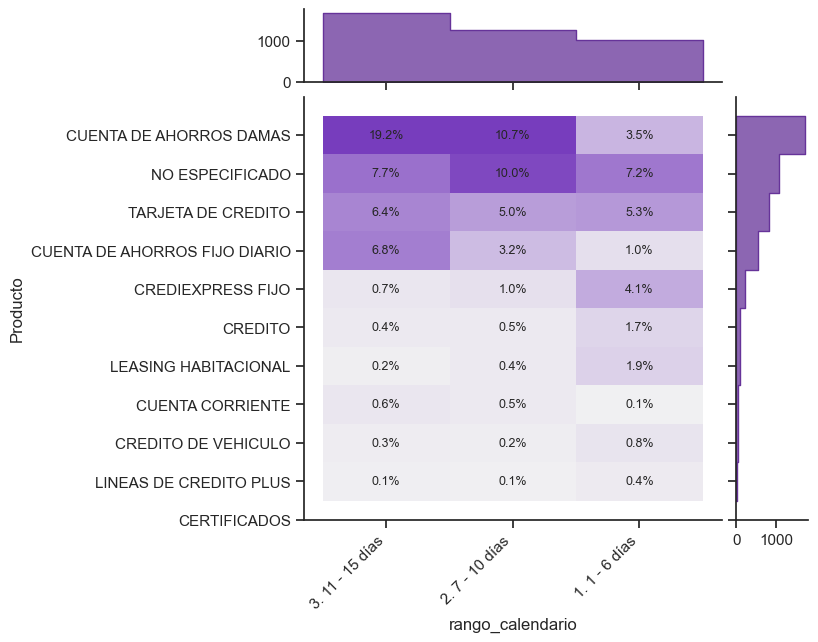

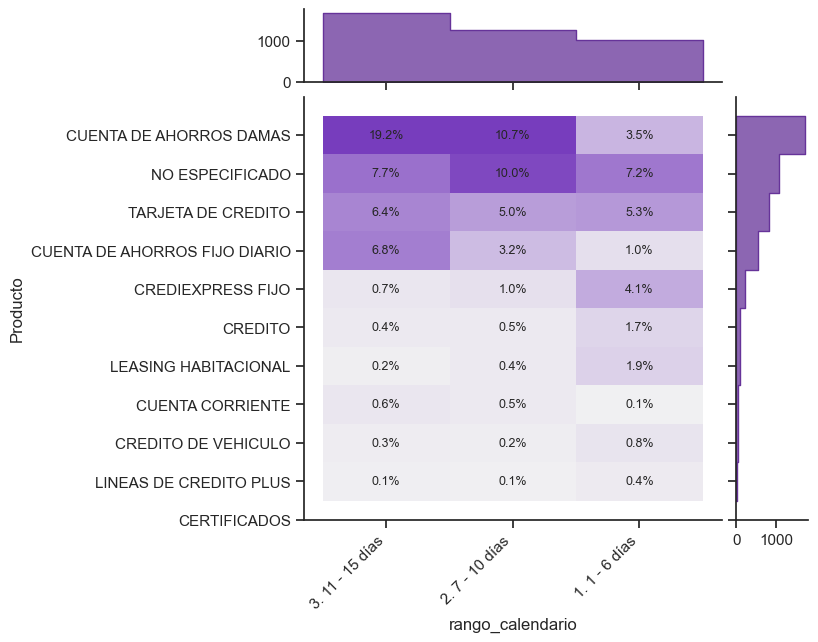

In [28]:
col_order = df['rango_calendario'].value_counts().index.tolist()[:3]
col_order_ = df['producto_'].value_counts().index.tolist()

plot_joint_distribution(
    df,
    x="rango_calendario",
    y="producto_",
    x_order=col_order,
    y_order=col_order_,
    label_rotation=45,
    x_label="rango_calendario",
    y_label="Producto",
    top_y=10,
    top_x=10,
    fontsize=9,
)



In [29]:
df['priorizacion'] = df['priorizacion'].astype(str)

In [30]:
# sweetviz to generate a report locally, will get AUTOMATICALLY LOGGED to experiment
report = sweetviz.analyze(df)
report.show_html(filepath="html/Datos_.html", open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report html/Datos_.html was generated.



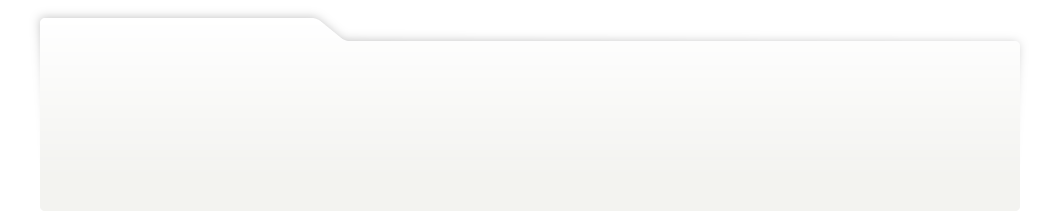
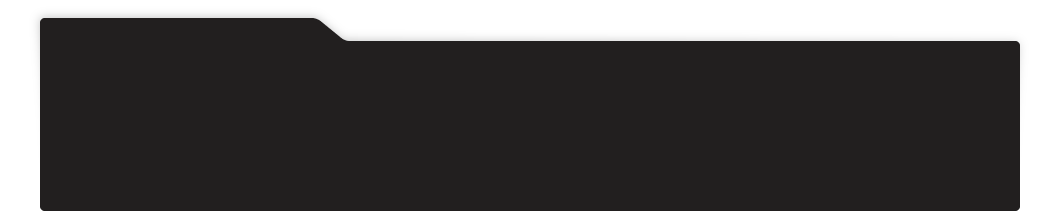
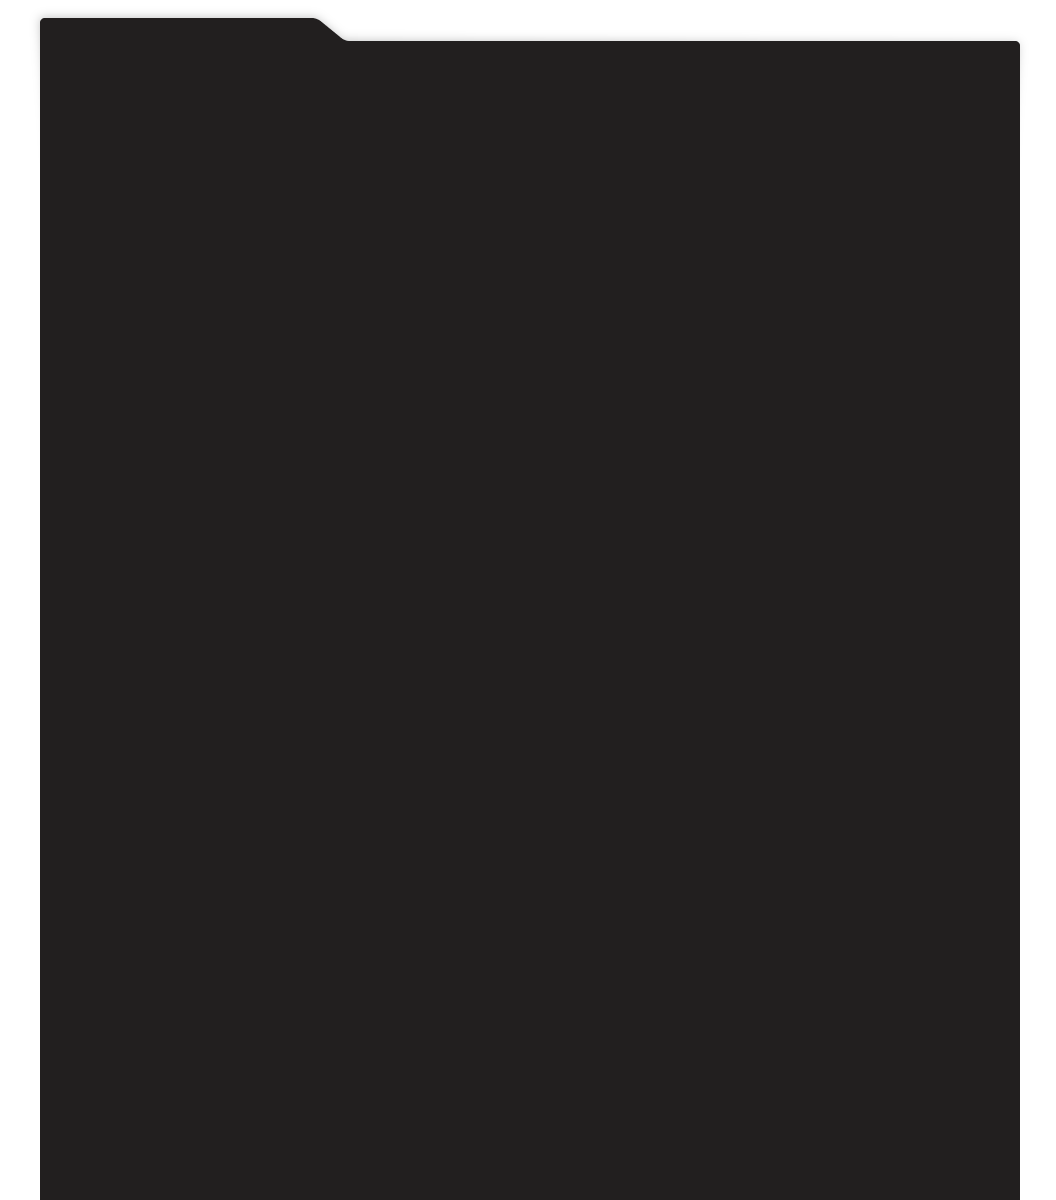
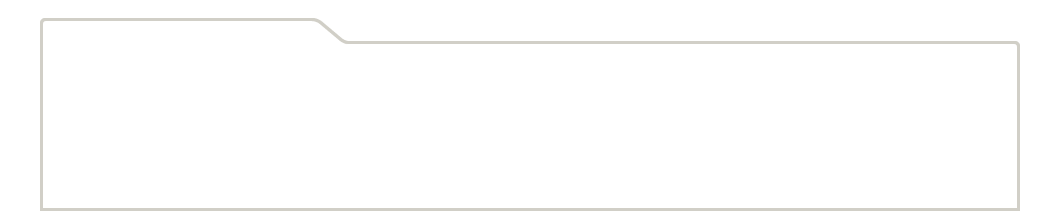
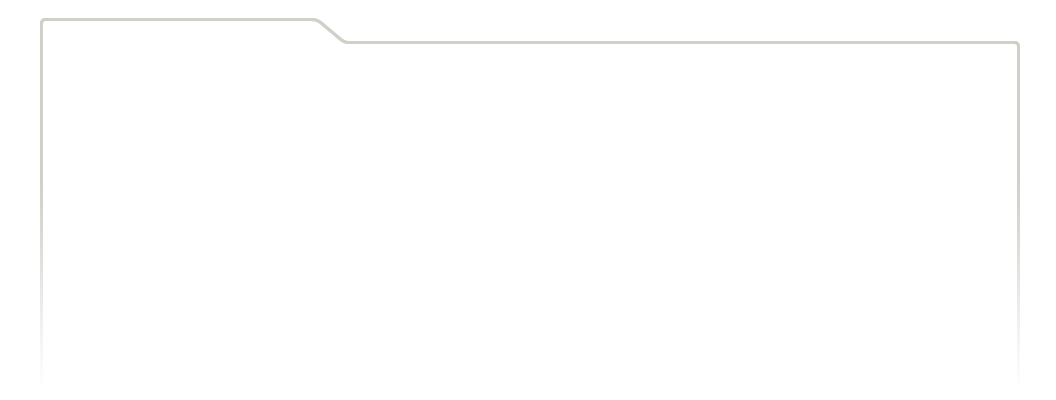
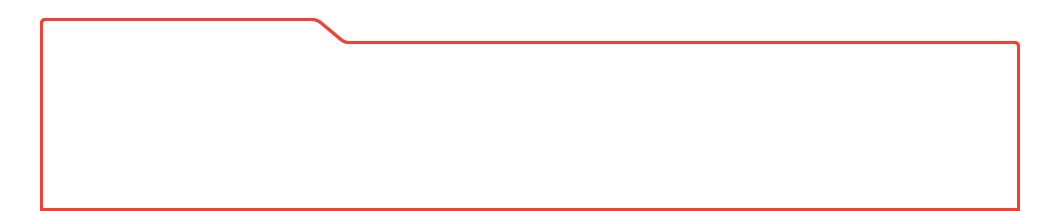
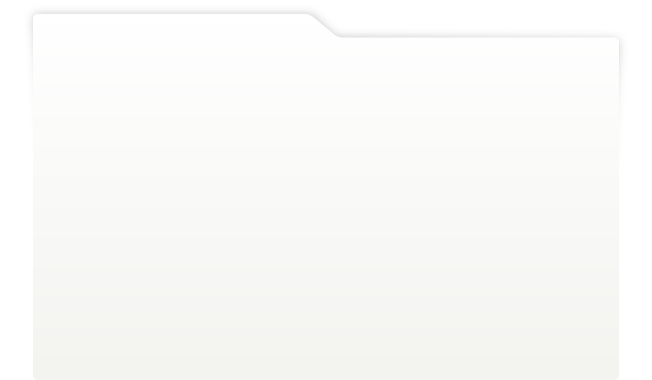
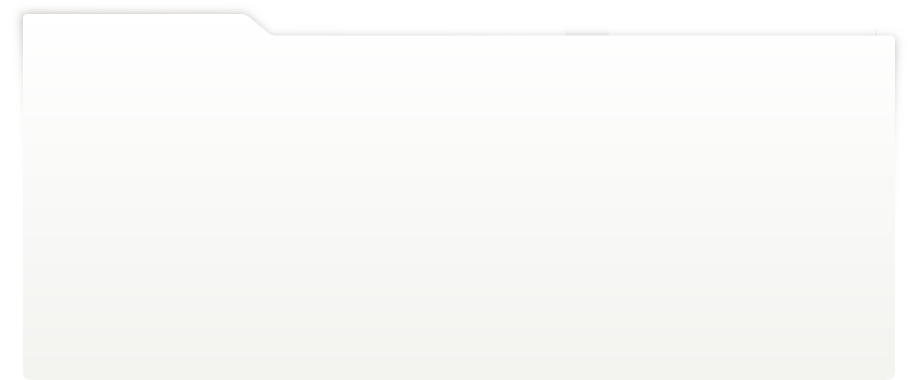
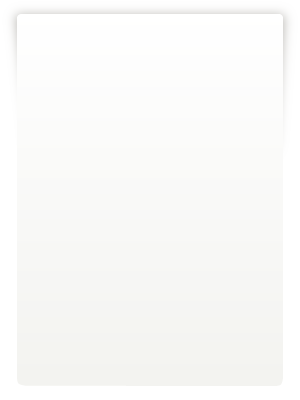
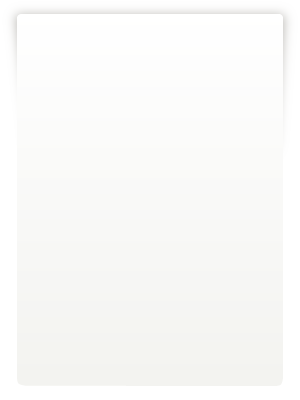
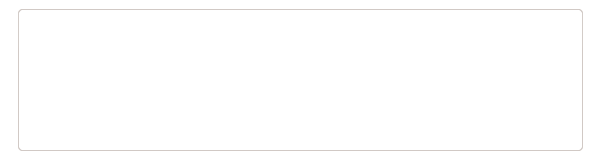
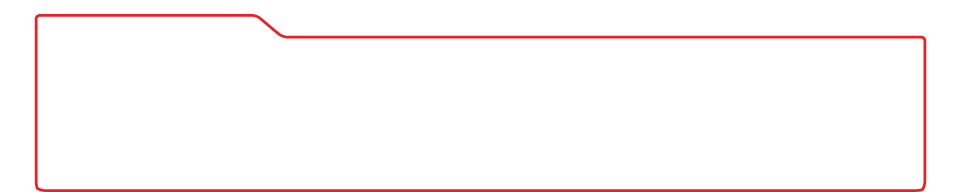
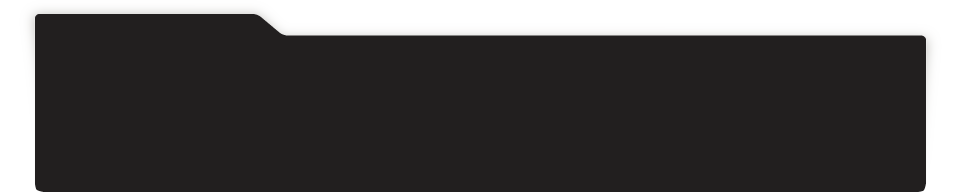
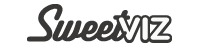
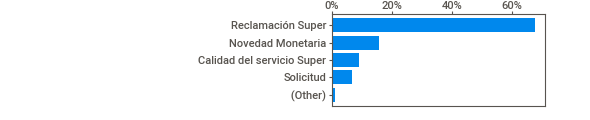
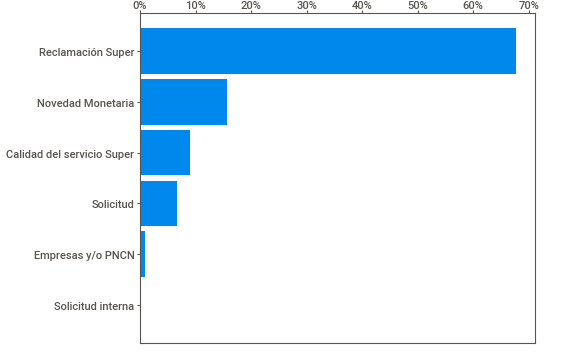
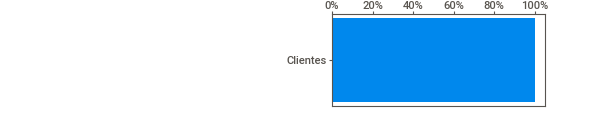
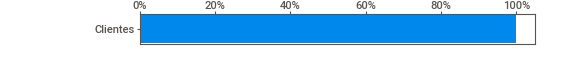
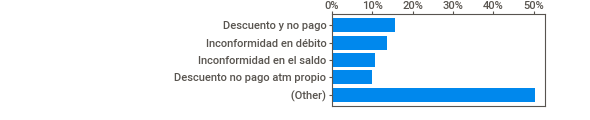
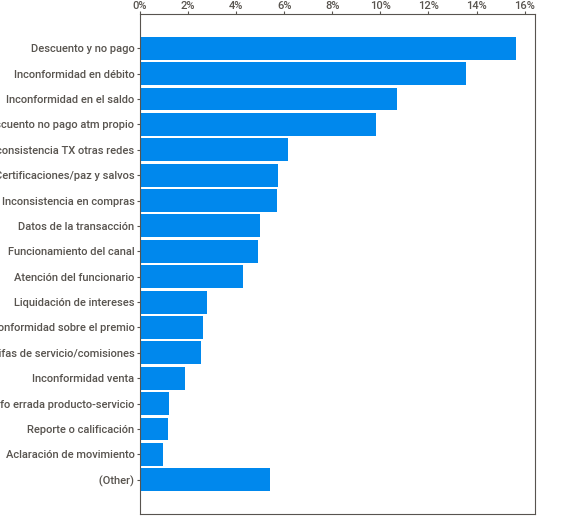
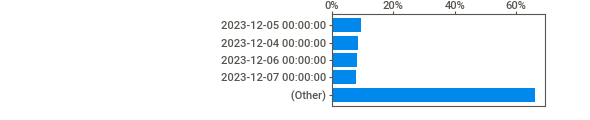
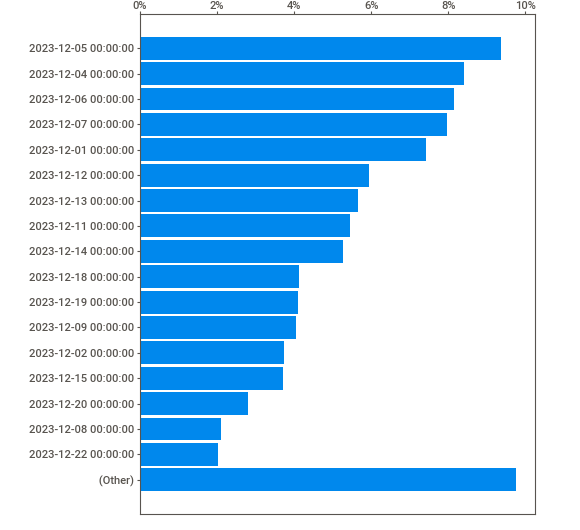
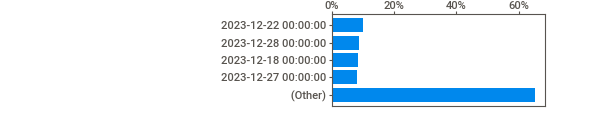
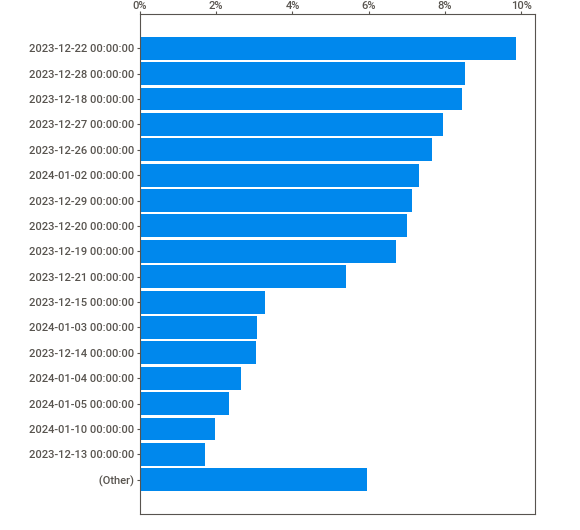
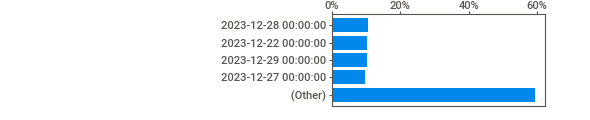
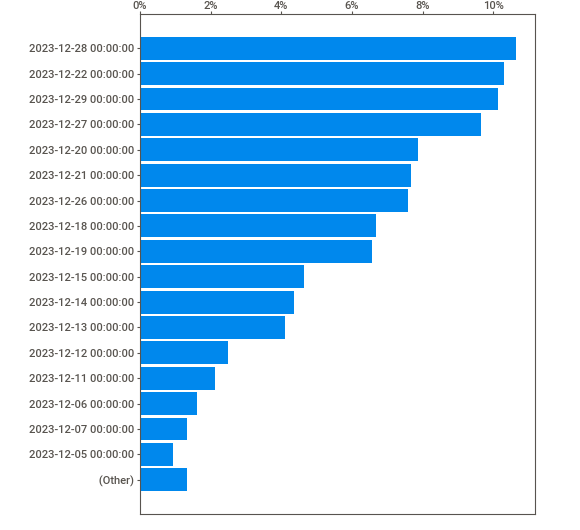
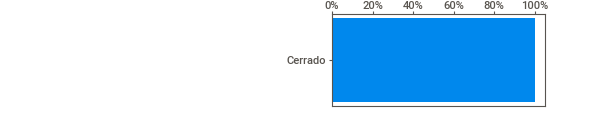
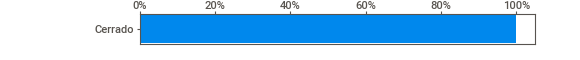
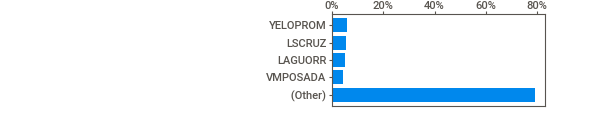
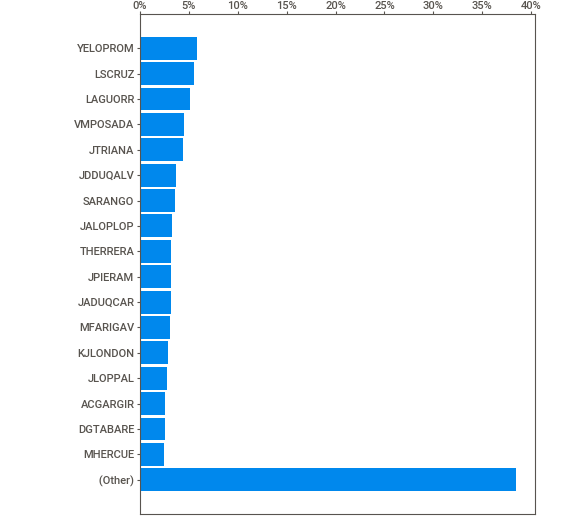
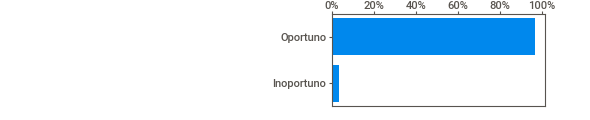
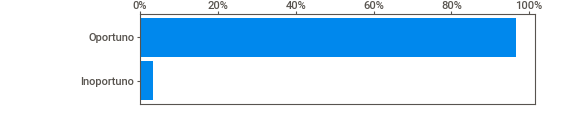
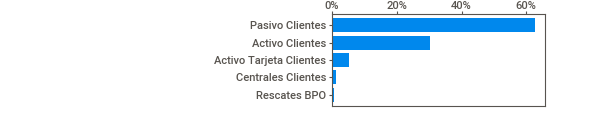
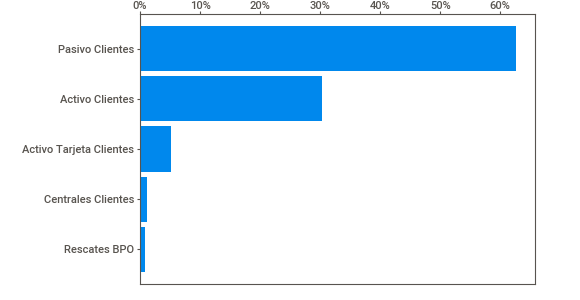
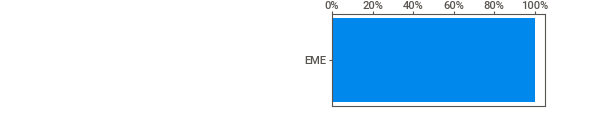
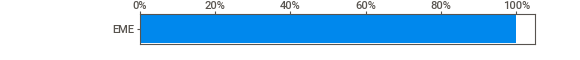
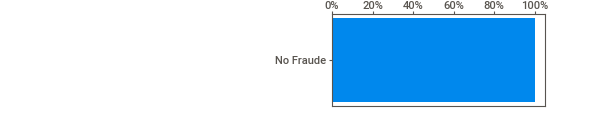
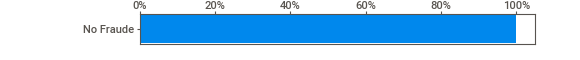
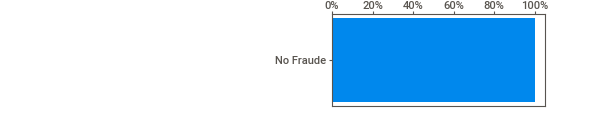
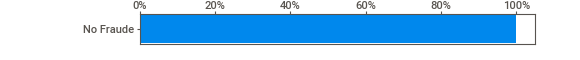
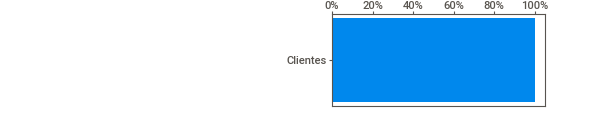
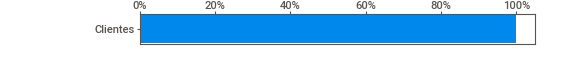
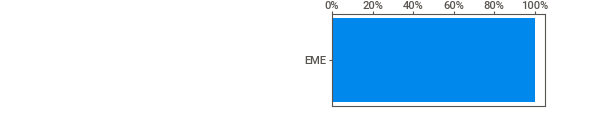
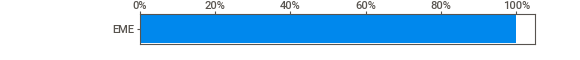
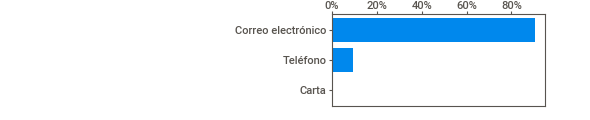
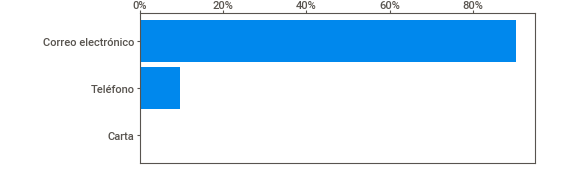
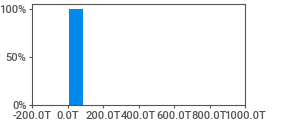
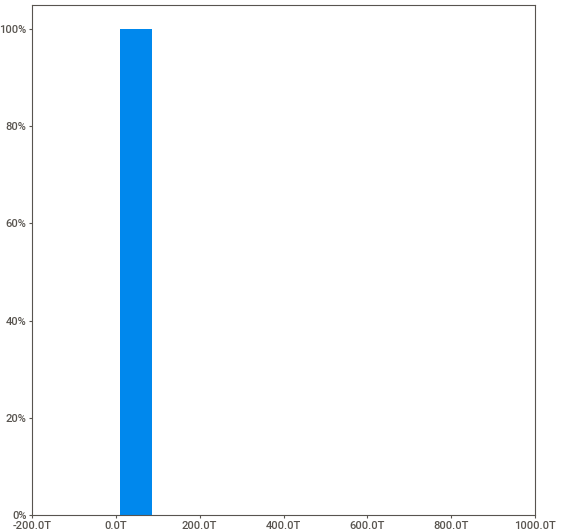
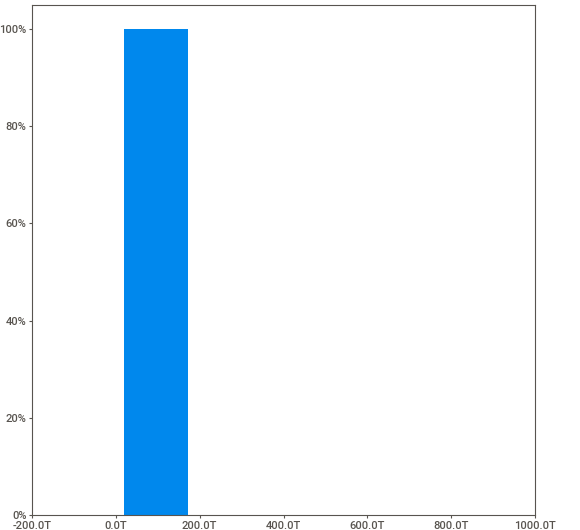
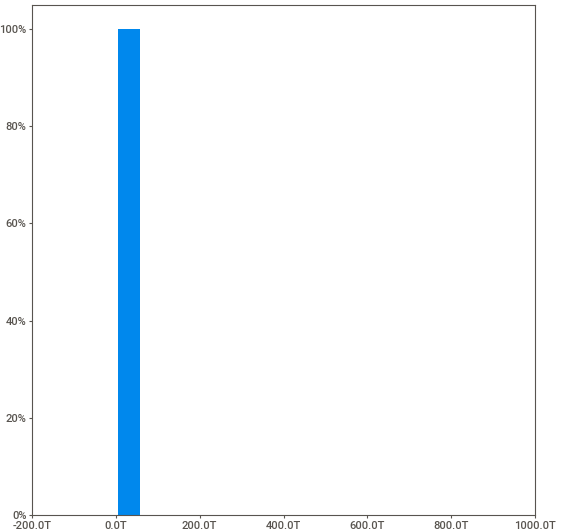
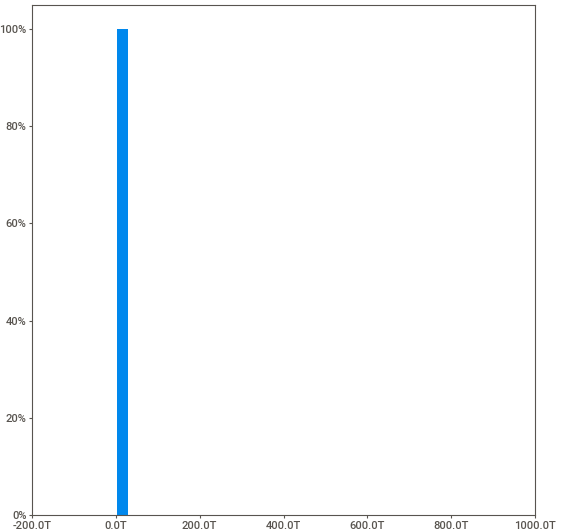
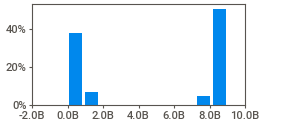
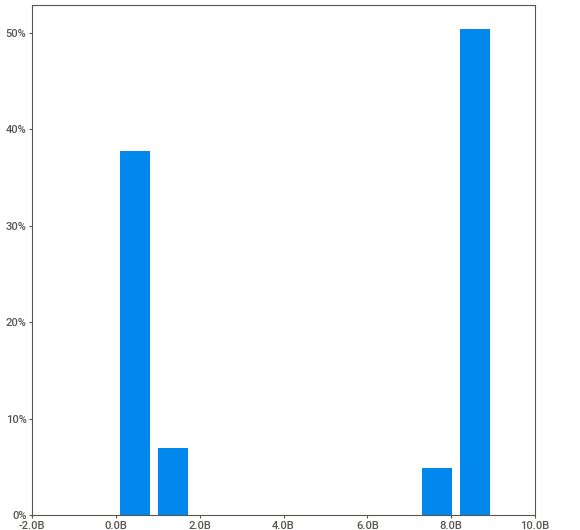
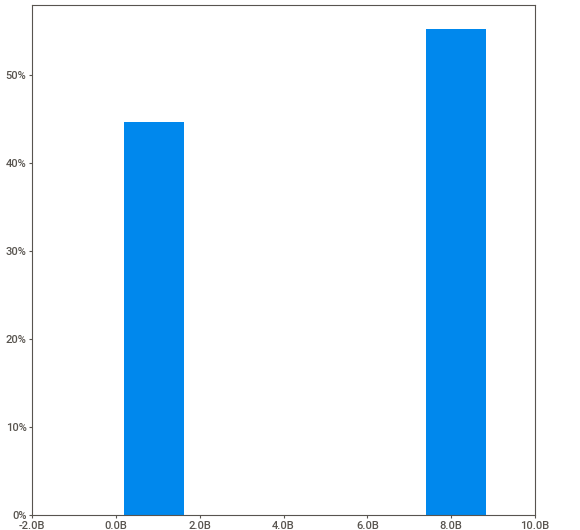
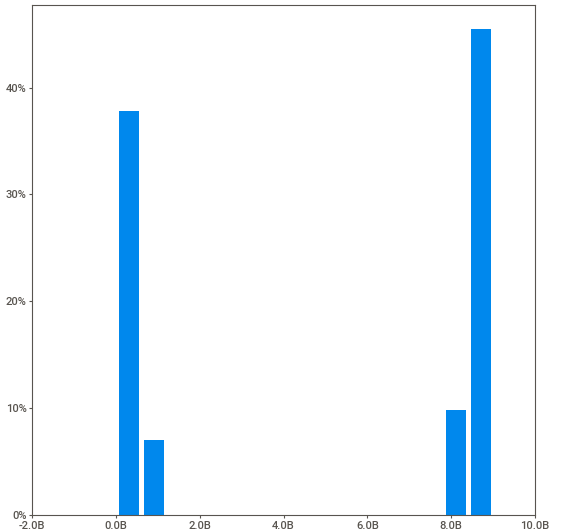
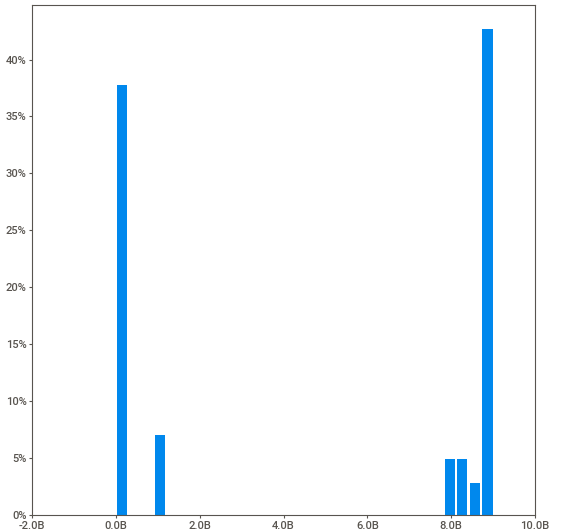
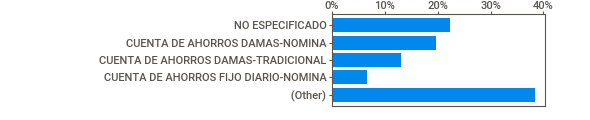
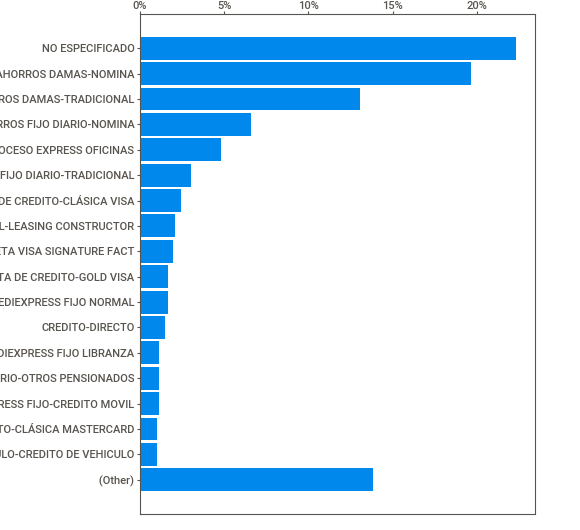
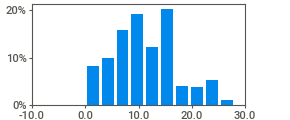
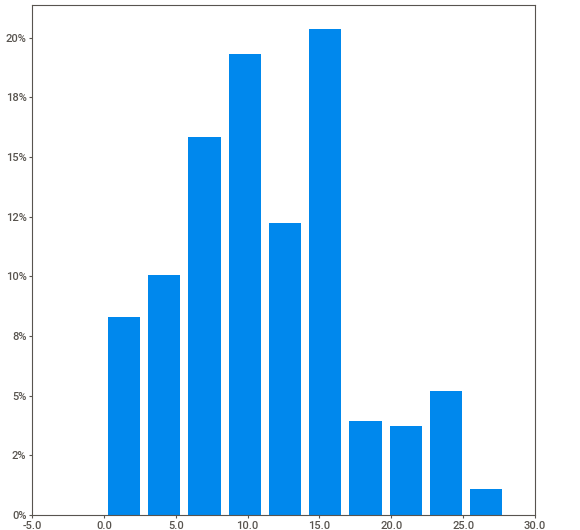
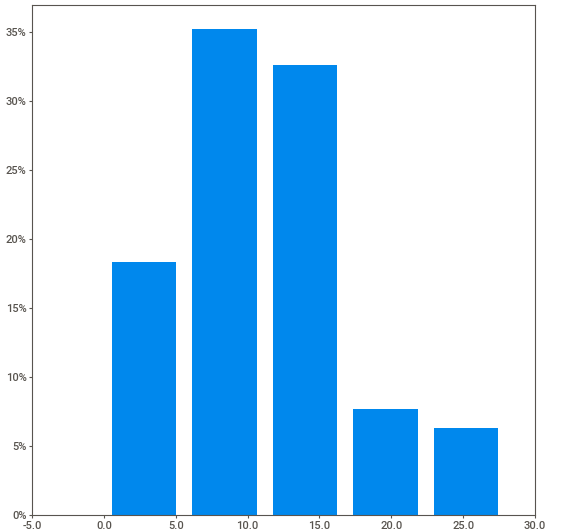
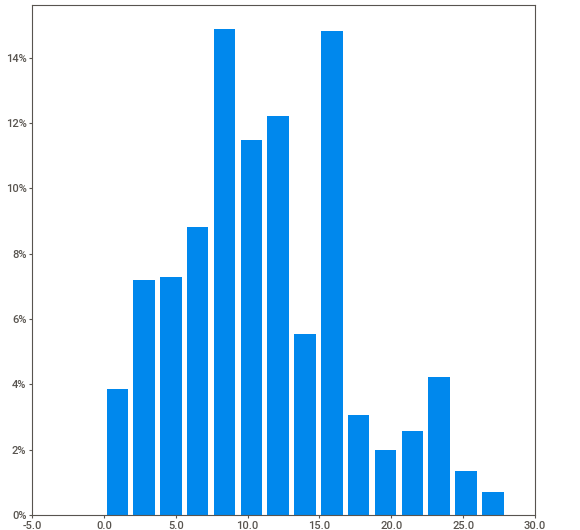
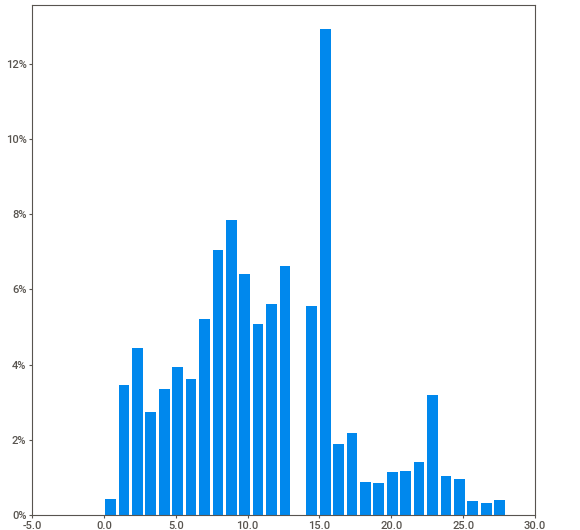
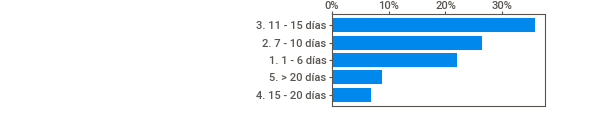
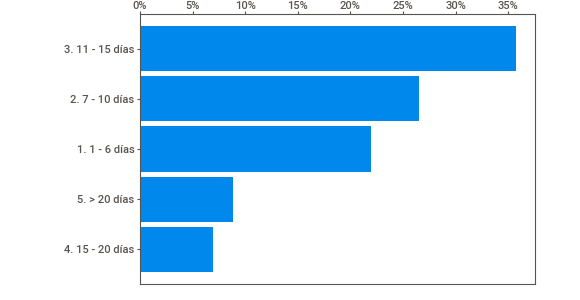
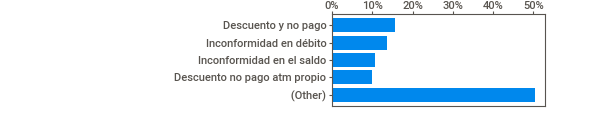
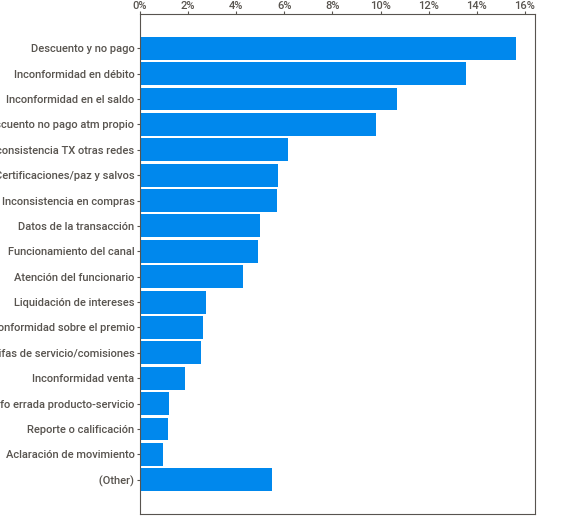
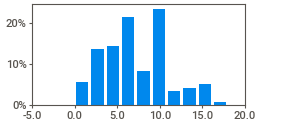
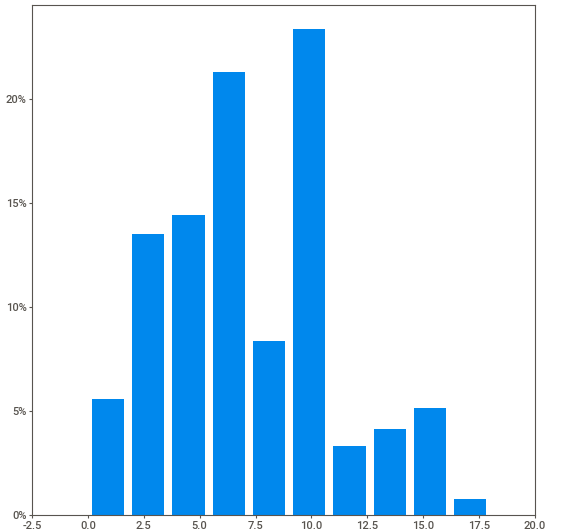
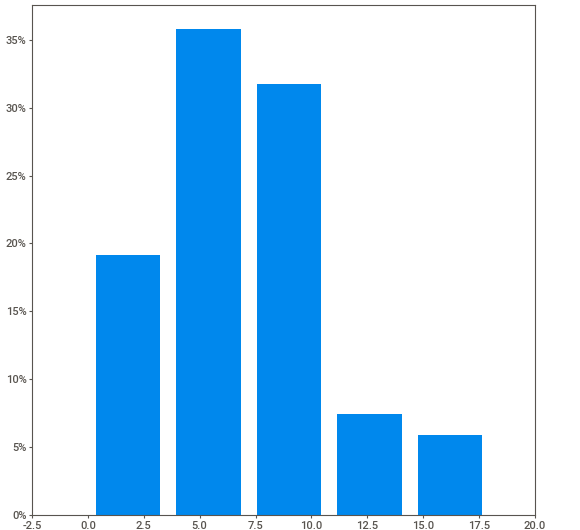
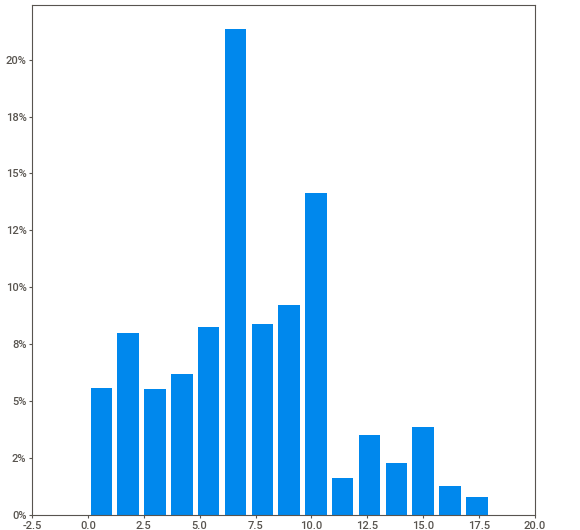
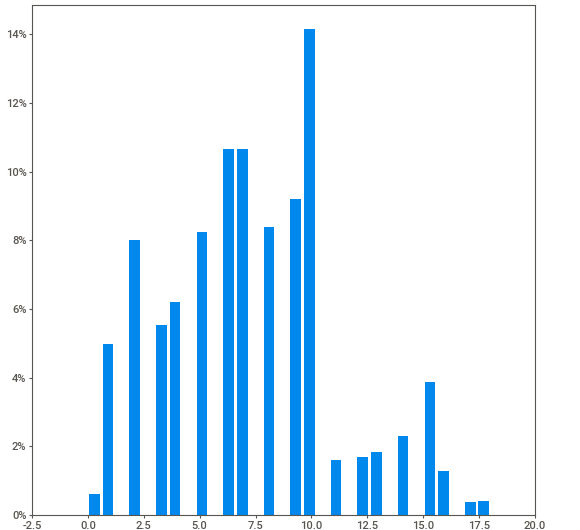
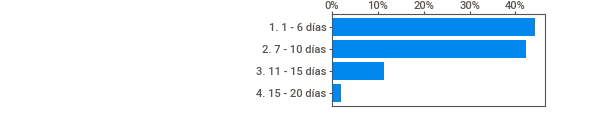
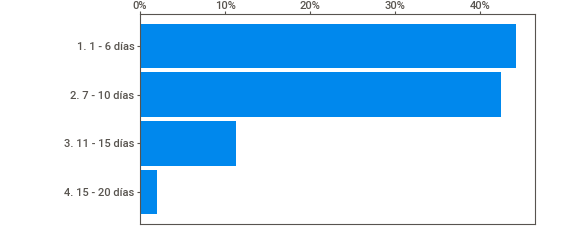
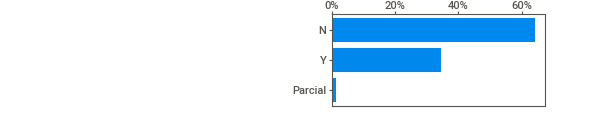
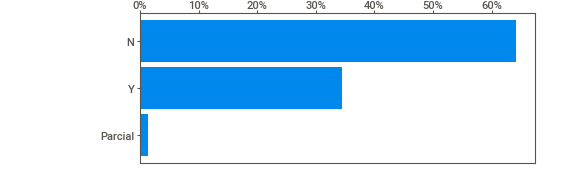
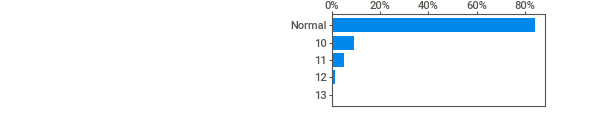
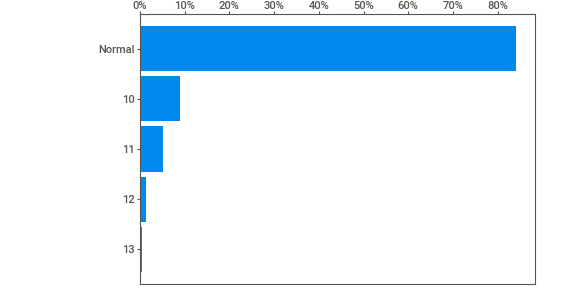
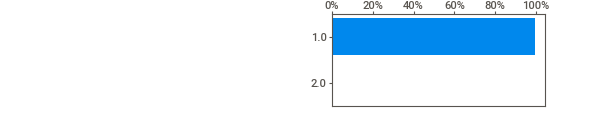
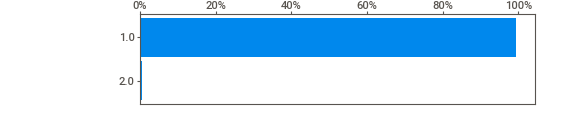
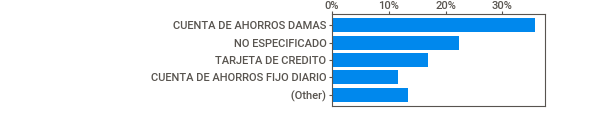
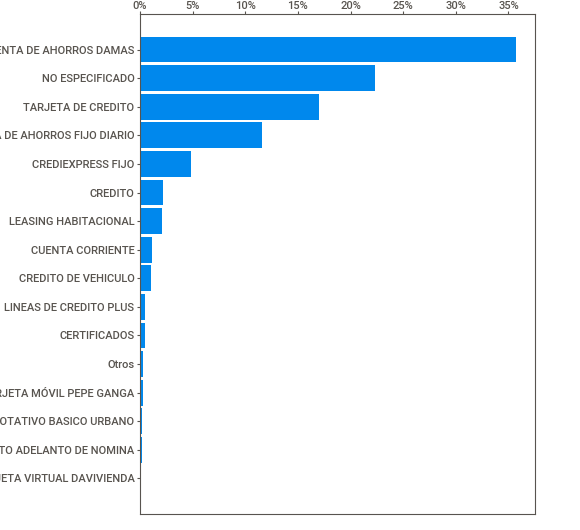
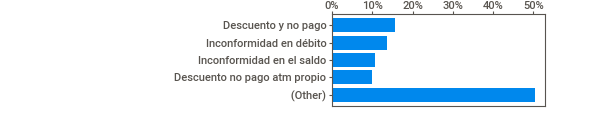
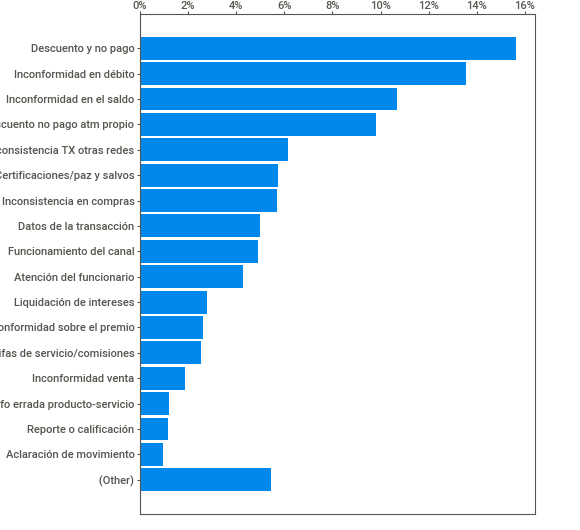
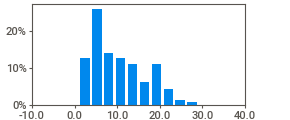
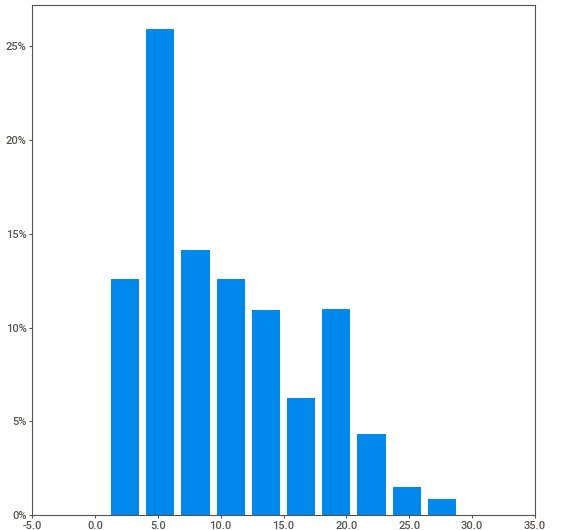
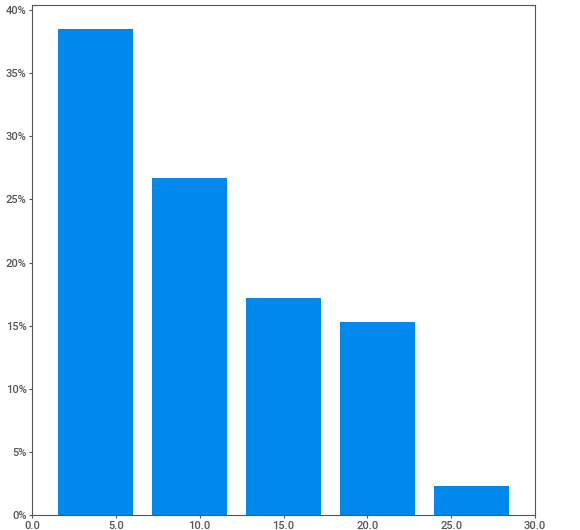
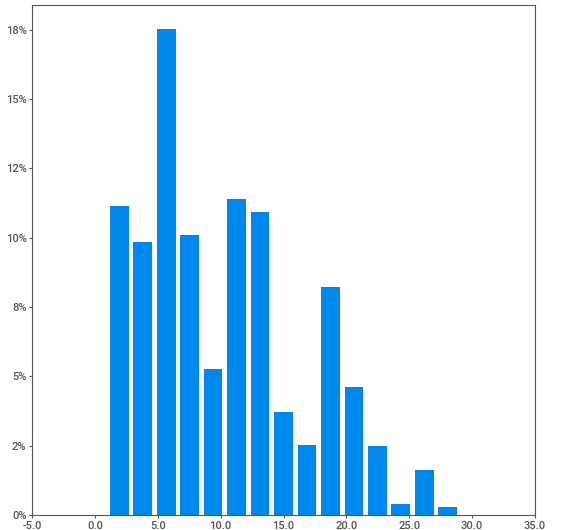
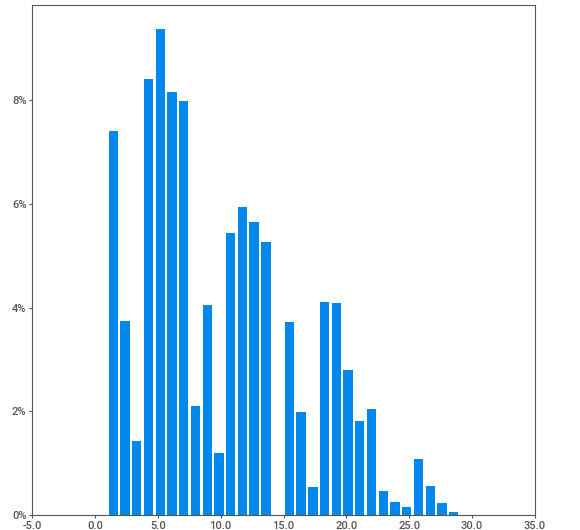
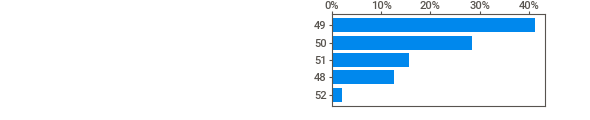
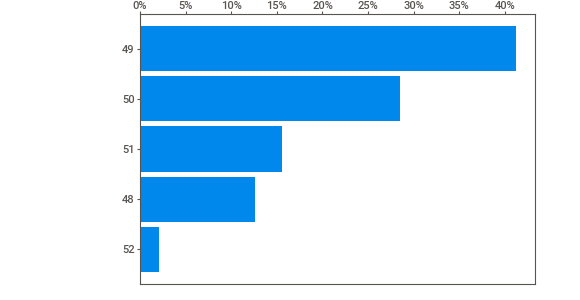
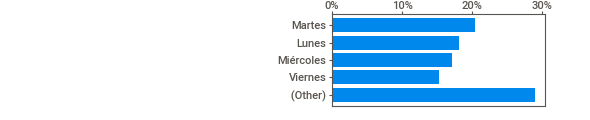
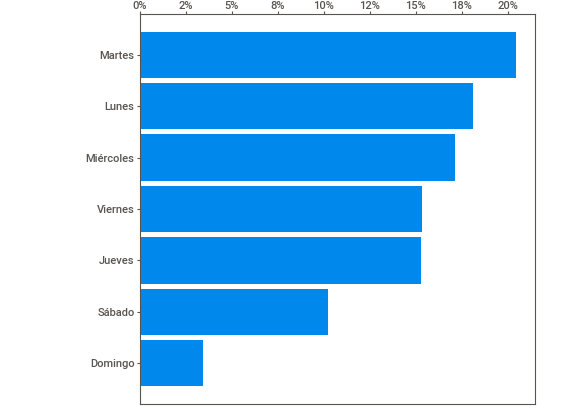
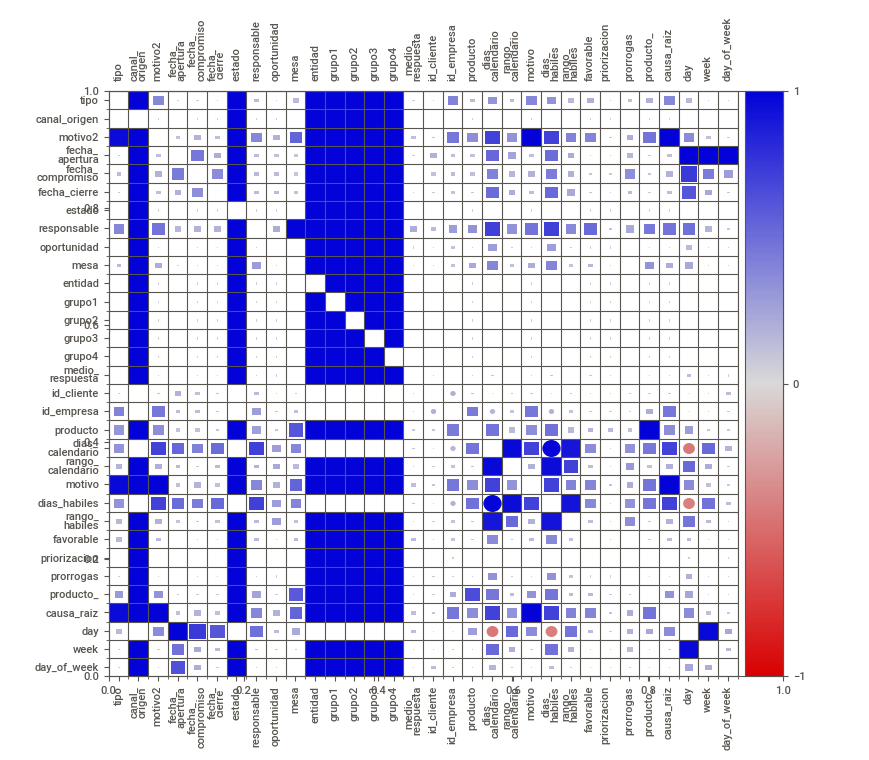
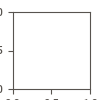

In [31]:
#To save the HTML format of the report, use this:
# report.show_html()

#To view the report inside a Jupyter Notebook, use this:
report.show_notebook()

### Campos relevantes en base de datos actual para "no_fraude":

- motivo2: el motivo de la solicitud. Es igual a columna motivo.
- tipo: tipo de la novedad.
- fecha de apertura: para ver la Temporalidad.
- Producto: Productos más frecuentes.
- causa_origen: origen de la causa que se indica en el motivo2.
- des2: relacionado con el departamento relacionado.
- medio_respuesta: el medio por el cual realizaron la respuesta al cliente.
- day_of_week: de la semana que se realizo la solicitud.
- day: día del mes que se realizo la soicitud. 

Está pendiente aplicar el modelo con el prompt actualizado con las categorias: para extraer cuales con las categorias relacionadas y subcategorias y poder alimentar en el análisis.

### Vista de las tipificaciones relacionadas con la sección de Cartera y Tarjeta de credito

In [32]:
Tipificaciones_motivo = pd.read_excel(path+'MOTIVOS.xlsx')

In [33]:
Tipificaciones_motivo

MOTIVOS CARTERA                     MOTIVOS TARJETA
0         Aclaración de movimiento          Aclaración de información
1               Aclaración Tramite           Aclaración de movimiento
2   Ajuste tasa hipotec. Retención                 Aclaración Tramite
3           Ajuste valor asegurado      Acumulación davipuntos-millas
4         Atención del funcionario             Ajuste valor asegurado
5         Bienes recibidos en pago           Atención del funcionario
6     Certificaciones/paz y salvos  Campañas (Call Bco y Oursourcing)
7      Cobro errado cuotas seguros                 Cancelación seguro
8                 Copia de polizas       Certificaciones/paz y salvos
9          Datos de la transacción        Cobro errado cuotas seguros
10  Diferencia intereses y/o saldo                   Copia de polizas
11                         Embargo            Datos de la transacción
12                        Embargos       Descuento no pago atm propio
13      Endoso póliza o cambio cia     Diferencia intereses y/o saldo
14               Estados de cuenta         Endoso póliza o cambio cia
15   Extracto no generado-recibido      Extracto no generado-recibido
16    Facilidades pago cobranza PJ           Funcionamiento del canal
17        Funcionamiento del canal            Inconformidad en débito
18      Histórico y planes de pago          Inconformidad en el saldo
19         Inconformidad en débito     Inconformidad gestión cobranza
20       Inconformidad en el saldo      Inconformidad sobre el premio
21  Inconformidad gestión cobranza                Inconformidad venta
22  Inconformidad Tasa Hip/Leasing         Inconformidad venta Seguro
23             Inconformidad venta       Inconsisten transf daviplata
24      Inconformidad venta Seguro          Inconsistencia en compras
25    Inconsisten transf daviplata     Inconsistencia en conservación
26  Inconsistencia acuerdo de pago            Inconsistencia en Saldo
27       Inconsistencia en compras      Inconsistencia pago servicios
28  Inconsistencia en conservación      Inconsistencia TX otras redes
29   Inconsistencia TX otras redes               Indemnización seguro
30            Indemnización seguro      Info errada producto-servicio
31   Info errada producto-servicio           Liquidación de intereses
32       Levantamiento de hipoteca                Pagos mal aplicados
33        Liquidación de intereses                Procesos Judiciales
34   No Central Seguridad Bancaria                Protección de datos
35  No Central Unidad cumplimiento               Reclam. Corresponsal
36          Notificaciones erradas             Reporte o calificación
37            Novedades de cartera                  Solicitud voucher
38             Pagos mal aplicados     Tarifas de servicio/comisiones
39             Procesos Judiciales             Tarjeta de crédito emp
40             Protección de datos                   Venta No Abonada
41            Reclam. Corresponsal                                NaN
42  Tarifas de servicio/comisiones                                NaN

In [34]:
Tipificaciones_motivo_cartera = Tipificaciones_motivo['MOTIVOS CARTERA ']
Tipificaciones_motivo_tarjeta = Tipificaciones_motivo['MOTIVOS TARJETA']

In [35]:
len(set(Tipificaciones_motivo_cartera) & set(Tipificaciones_motivo_tarjeta))

29

In [36]:
set(Tipificaciones_motivo_cartera) & set(Tipificaciones_motivo_tarjeta)

{'Aclaración Tramite',
 'Aclaración de movimiento',
 'Ajuste valor asegurado',
 'Atención del funcionario',
 'Certificaciones/paz y salvos',
 'Cobro errado cuotas seguros',
 'Copia de polizas',
 'Datos de la transacción',
 'Diferencia intereses y/o saldo',
 'Endoso póliza o cambio cia',
 'Extracto no generado-recibido',
 'Funcionamiento del canal',
 'Inconformidad en débito',
 'Inconformidad en el saldo',
 'Inconformidad gestión cobranza',
 'Inconformidad venta',
 'Inconformidad venta Seguro',
 'Inconsisten transf daviplata',
 'Inconsistencia TX otras redes',
 'Inconsistencia en compras',
 'Inconsistencia en conservación',
 'Indemnización seguro',
 'Info errada producto-servicio',
 'Liquidación de intereses',
 'Pagos mal aplicados',
 'Procesos Judiciales',
 'Protección de datos',
 'Reclam. Corresponsal',
 'Tarifas de servicio/comisiones'}

In [37]:
# visualización de datos
dtale_app.USE_NGROK = False
dtale.show(df[df.causa_raiz.str.contains('Aclaración de movimiento')])

2025-02-27 11:21:44,756 - INFO - Executing shutdown due to inactivity...
2025-02-27 11:21:52,904 - INFO - Executing shutdown...
2025-02-27 11:21:52,906 - INFO - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
2025-02-27 11:21:53,050 - ERROR - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
2025-02-27 11:21:53,051 - ERROR - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
2025-02-27 11:21:53,051 - ERROR - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
2025-02-27 11:21:53,052 - ERROR - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable
2025-02-27 11:21:53,053 - ERROR - The api_key client option must be set either by passing api_